# Simple Linear Regression

### Predicting Salary based on Year of Experience

The given dataset contains information about work experince in years and corresponding salary of an employee. The goal is to create a model which can predict the salary based on employee years of experience.

In [62]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [63]:
# Importing the dataset
dataset = pd.read_csv('Documents/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [64]:
#Checking if there is any null value present in the dataset
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [65]:
#Analyze the data 
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [66]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


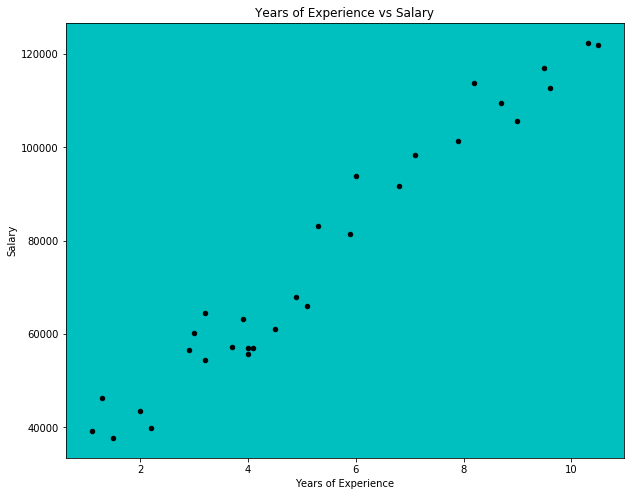

In [101]:
#Creating a scatter plot between Salary and Years of Experinece.
plt.rcParams['axes.facecolor'] = 'c'
dataset.plot(kind="scatter",x="YearsExperience",y="Salary",color="black",figsize=(10,8))
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [69]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [71]:
#Combining two arrays
y_final = y_test, np.round(y_pred,2)
y_final

(array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
         83088, 101302], dtype=int64),
 array([ 40835.11, 123079.4 ,  65134.56,  63265.37, 115602.65, 108125.89,
        116537.24,  64199.96,  76349.69, 100649.14]))

In [72]:
result = pd.DataFrame(list(y_final))
result

,0,1,2,3,4,5,6,7,8,9
0,37731.00,122391.0,57081.00,63218.00,116969.00,109431.00,112635.00,55794.00,83088.00,101302.00
1,40835.11,123079.4,65134.56,63265.37,115602.65,108125.89,116537.24,64199.96,76349.69,100649.14


In [73]:
result = pd.DataFrame(list(y_final))
result = result.transpose()
result.columns = ["Actual Salary", "Predicted Salary"]
result.head(10)


,Actual Salary,Predicted Salary
0,37731.0,40835.11
1,122391.0,123079.40
2,57081.0,65134.56
3,63218.0,63265.37
4,116969.0,115602.65
5,109431.0,108125.89
6,112635.0,116537.24
7,55794.0,64199.96
8,83088.0,76349.69
9,101302.0,100649.14


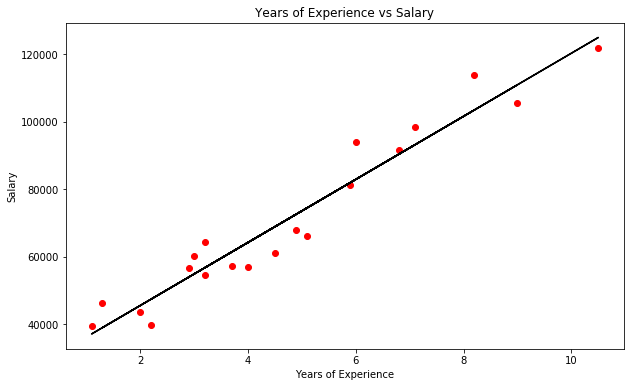

In [130]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.rcParams['axes.facecolor'] = 'w'
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

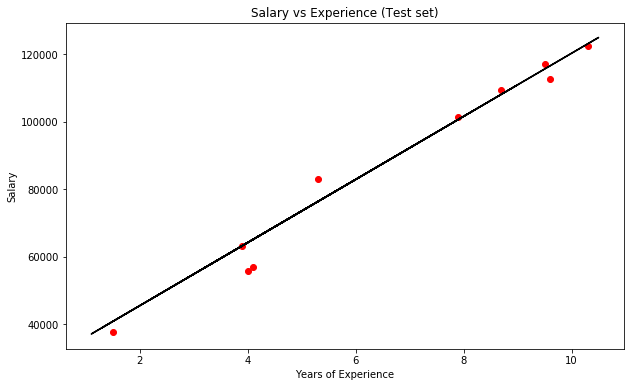

In [132]:
# Visualising the Predicted result
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [76]:
n = float(input())
years = np.array([n])
years = years.reshape(-1,1)
own_pred = regressor.predict(years)
print("No of Years = {}".format(years))
print("Salary = {}".format(own_pred[0]))

8
No of Years = [[8.]]
Salary = 101583.73178901015
